

<font size="6">**K-Means em Base de Dados de Câncer de Mama**</font>

- A base de dados exibe uma série de atributos que são imagens digitais das células cancerígenas. 

- O algoritmo K-Means faz o agrupamento através da similaridade de atributos. Contudo, a similaridade é uma medida que, por si só, é extremamente subjetiva. Desse modo , são escolhidos k objetos (centroides) que serão a base de cada grupo. Assim, a similaridade entre os grupos será definida pela distância dos novos objetos aos centroides; 

- aquele que possuir a menor distância será definido como o grupo para o o novo objeto.

- Classes obtidas: classe B ou M (Benigno ou Maligno)

In [40]:
# Carregar as bibliotecas necessárias: 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

from sklearn import metrics

from sklearn.cluster import KMeans


# Carregar a base de dados:

dados = pd.read_csv("data_cancer_mama.csv")

In [41]:
# Mostrar detalhes dos 5 primeiros registros da base:

dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- Faremos a remoção dos atributos desnecessários ou que não devem ser processados pelo algoritmo.

- O atributo que representa as classes, no caso a coluna "diagnosis", é separado dos demais atributos, que são efetivamente os dados que serão analisados.

- Também são removidas as colunas com informações que não são relevantes: 'id' (número de identificação do registro) e 'Unnamed: 32' (coluna com valor faltante para todos os registros).

In [42]:
# Colocar no vetor Y os valores referentes às classes

Y = dados.diagnosis  


# Fazer a remoção das colunas desnecessárias

list = ['Unnamed: 32','id','diagnosis']        # lista com as colunas a serem removidas
X = dados.drop(list,axis = 1 )          
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<font size="5">**Aplicar PCA no conjunto de dados**</font>

Existe uma técnica de Análise de Componentes Principais (PCA), cuja ideia principal é reduzir a dimensionalidade de um conjunto de dados que consiste em muitas variáveis correlacionadas entre si, seja de maneira forte ou leve, mantendo a variação presente no conjunto de dados até a extensão máxima.

Iremos aplicar PCA nos dados carregados. Primeiramente é necessária fazer uma transformação dos dados.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Para aplicar PCA, primeiro é preciso fazer a transformação dos dados
x = StandardScaler().fit_transform(X)
y = Y

#Aplicar PCA
pca = PCA(n_components=2) #escolhe a quantidade de componentes
principalComponents = pca.fit_transform(x) #aplica nos dados

In [44]:
finalDf

,principal component 1,principal component 2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


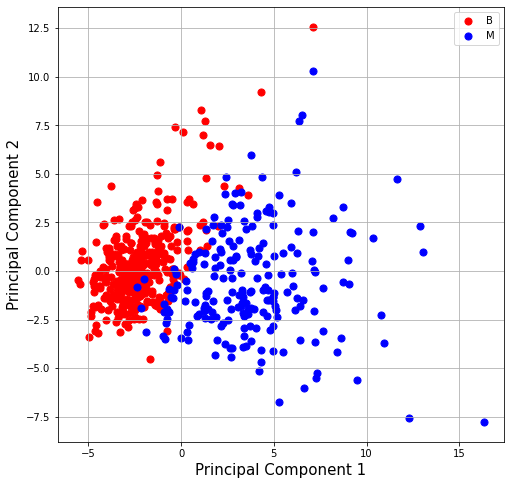

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #escolhe a quantidade de componentes
principalComponents = pca.fit_transform(x) #aplica nos dados
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dados.diagnosis], axis = 1)

#plotar os dados reais:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['B', 'M']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [53]:
#indicesToKeep
principalComponents
#finalDf

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.6720101 ],
       [-5.4752433 , -0.67063679]])

In [46]:
dados

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<font size="5">**Determinar valor de K**</font>
    
Iremos utilizar o algoritmo K-Means.

Primeiramente iremos mostrar um gráfico que confronta quantidade de clusters(k) com a medida de validação Inertia que é a soma dos erros quadrados de cada ponto de um cluster com seu centroide.

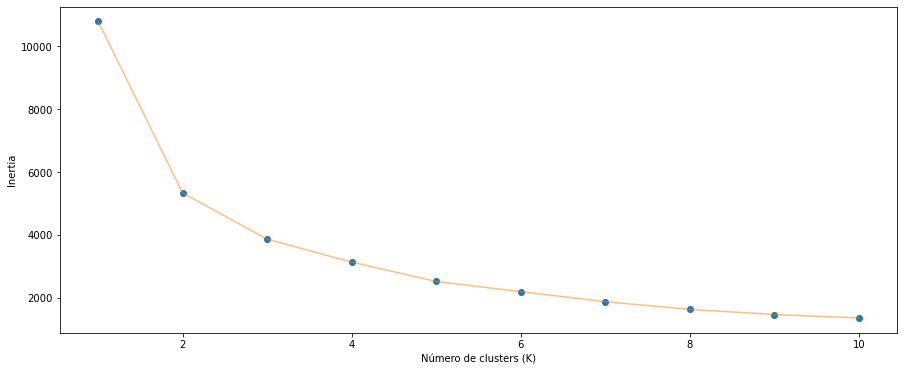

In [92]:
#Confrontar K vs Inertia
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n , random_state= 111, algorithm='auto'))
    algorithm.fit(principalComponents)
    inertia.append(algorithm.inertia_) # inertia_ eh a distancia euclidiana ao centroide mais proximo, logo, sempre sera descrescente
    
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de clusters (K)') , plt.ylabel('Inertia')
plt.show()

In [33]:
#Aplicar K-Means com K=2

algorithm = (KMeans(n_clusters = 2, random_state= 111 ) )
algorithm.fit(principalComponents)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

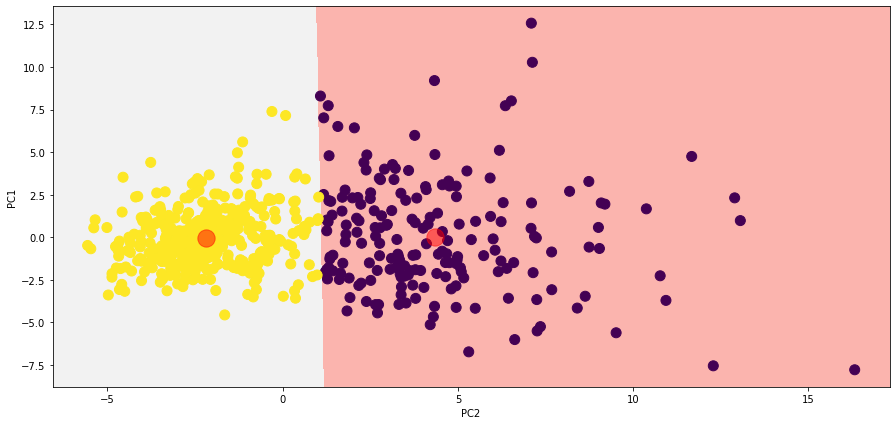

In [72]:
#Mostrar como ficou depois de clusterizado com k=2:
h = 0.02
x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, aspect = 'auto', origin='lower')

plt.scatter( x = 'principal component 1' ,y = 'principal component 2' , data =principalDf, c = labels1 , 
            s = 100 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

<font size="5">**Validação**</font>

Iremos calcular a Porcentagem de Acerto do modelo, ou seja, iremos verificar o quanto os clusters formados correspondem às classes esperadas.

In [35]:
labels_pred = np.where(labels1==1, 'B', 'M') #transformar 1 e 0 em B e M

#transformar em listas:
predito = labels_pred.tolist()
esperado = Y.tolist()

#Calcular porcentagem
certos = 0
total_exemplos = len(predito)
for i in range(0, total_exemplos):
  if ( predito[i] == esperado[i]):
    certos = certos + 1
print(certos, "/" , total_exemplos)
acerto =  certos/len(predito) 


print("Porcentagem de acerto = ", acerto)

516 / 569
Porcentagem de acerto =  0.9068541300527241


O valor obtido na Porcentagem de Acerto foi de 90,68%, isso significa que a partição obtida é uma boa representação das classes.

<font size="5">**Índice de Silhouette**</font>

- O Índice de Silhouette é uma medida de como um objeto é semelhante ao seu próprio cluster (coesão) comparado a outros clusters (separação). 
- O Índice de Silhouette varia de −1 a +1, onde um valor alto indica que o objeto é bem compatível com seu próprio cluster e mal combinado com os clusters vizinhos. Se a maioria dos objetos tiver um valor alto, a configuração de cluster será apropriada.

In [36]:
#Silhouette
print("Silhouette =", metrics.silhouette_score(principalComponents, labels_pred, metric='euclidean') ) 


Silhouette = 0.5084690190666472


O valor obtido no Índice de Silhouette foi de 0.5084690190672833, isso significa que os clusters são densos.

<font size="5">**Validação Score de Davies-Bouldin**</font>

- Esse score é definido como a medida de similaridade média de cada cluster com seu cluster mais similar, em que a similaridade é a proporção de distâncias dentro do cluster para distâncias entre clusters.

- Assim, os clusters que estão mais distantes e menos dispersos resultarão em uma pontuação melhor.

In [37]:
from sklearn.metrics import davies_bouldin_score
#Davies Bouldin
print("Davies Bouldin = ", davies_bouldin_score(principalComponents, labels_pred) )



Davies Bouldin =  0.846740380991572


O valor obtido no Score de Davies-Bouldin foi de 0.8467403809951706, esse valor alto representa que os clusters formados não estão muito separados

<font size="4">**Conclusão**</font>

- Realizamos as etapas de aprendizado de máquina para a atividade de agrupamento, de modo a testar se o algoritmo K-Means seria capaz de agrupar as classes B e M da forma correta. 
- Apesar do número classes ter sido "forçado" para 2 - para que fosse possível usar o atributo diagnosis - mesmo não sendo o k ideal, a porcentagem de acerto se manteve acima dos 90%, enquanto na classificação usando o KNN, no qual escolhemos um k (número de vizinhos ideal) foi de 93%. 
- Desse modo, conclui-se que a aplicação do algoritmo K-Means nessa base de dados proporcionou um resultado de modelo considerado extremamente satisfatório.